# Quantium Task 2 Selecting Control Stores for Trial Evaluation  
### Objective:   
Identify suitable control stores that have similar performance metrics to the trial stores before the trial period started. These control stores will serve as a baseline to compare against the trial stores to evaluate the trial's impact on sales.  
  
#### Key Steps:  
Data Preparation:  
  
Load the Dataset: Import the sales data of all stores into a DataFrame.  
Filter Pre-Trial Data: Focus on data before the trial period to establish a baseline.  
Metric Definition:  

Total Sales Revenue: Sum of sales for each store.  
Total Number of Customers: Unique customers for each store.  
Average Number of Transactions per Customer: Transactions divided by the number of unique customers for each store.  
Aggregate Metrics:  
  
Group data by store and month to calculate the defined metrics.  
Comparison and Selection:  
  
Similarity Measures: Use statistical methods such as Pearson correlations or magnitude distance to compare metrics between stores.  
Visual Analysis: Create visualizations (e.g., scatter plots, line graphs) to identify stores with similar performance to the trial stores.  
Function Creation:  

Write a function to automate the comparison and selection process, reducing the need to repeat the analysis for each trial store.  
Control Store Identification:  

Select control stores that closely match the trial stores in terms of the defined performance metrics.  
 

# Data Preparation

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

# Ignore runtime warnings
warnings.filterwarnings("ignore", message="Degrees of freedom <= 0 for slice")
warnings.filterwarnings("ignore", message="divide by zero encountered in ")
warnings.filterwarnings("ignore", message="invalid value encountered in ")



In [82]:
data = pd.read_csv('QVI_data.csv')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


Julia has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.

In [83]:
#convert date to date month
data.DATE = pd.to_datetime(data['DATE']).dt.to_period('M')

In [84]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [109]:
#group each store by each month and find number of txns for that month, total sales for that month and num of unique customers
monthly = (data.groupby(['DATE','STORE_NBR'])
.agg(monthly_txns =('DATE','count'),total_sales = ('TOT_SALES','sum'), num_cust = ('LYLTY_CARD_NBR','nunique')).reset_index())

In [107]:
monthly.head()

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust
0,2018-07,1,52,206.9,49
1,2018-07,2,41,150.8,39
2,2018-07,3,138,1205.7,112
3,2018-07,4,160,1399.9,128
4,2018-07,5,120,812.0,93


In [108]:
#Input store number to find the monthly breakdown of sales for that store
monthly[monthly.STORE_NBR==1]

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust
0,2018-07,1,52,206.9,49
266,2018-08,1,43,176.1,42
529,2018-09,1,62,278.8,59
793,2018-10,1,45,188.1,44
1058,2018-11,1,47,192.6,46
1322,2018-12,1,47,189.6,42
1585,2019-01,1,36,154.8,35
1848,2019-02,1,55,225.4,52
2112,2019-03,1,49,192.9,45
2377,2019-04,1,43,192.9,42


In [114]:
#create a new column for average transactions per customer
monthly['avg_txn']=monthly['monthly_txns']/monthly['num_cust']

In [113]:
monthly.head()

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust,avg_txn
0,2018-07,1,52,206.9,49,1.061224
1,2018-07,2,41,150.8,39,1.051282
2,2018-07,3,138,1205.7,112,1.232143
3,2018-07,4,160,1399.9,128,1.250000
4,2018-07,5,120,812.0,93,1.290323


In [135]:
#Create average sakes per txn as this is a more comparable measure between stores
monthly['avg_sales_txn'] = monthly['total_sales']/monthly['monthly_txns']
monthly.head()

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust,avg_txn,avg_sales_txn
0,2018-07,1,52,206.9,49,1.061224,3.978846
1,2018-07,2,41,150.8,39,1.051282,3.678049
2,2018-07,3,138,1205.7,112,1.232143,8.736957
3,2018-07,4,160,1399.9,128,1.250000,8.749375
4,2018-07,5,120,812.0,93,1.290323,6.766667


# Store Analysis


In [136]:
#Get store 77 data
s77 = monthly[monthly.STORE_NBR==77].reset_index()
s77

,index,DATE,STORE_NBR,monthly_txns,total_sales,num_cust,avg_txn,avg_sales_txn
0,73,2018-07,77,55,296.8,51,1.078431,5.396364
1,338,2018-08,77,48,255.5,47,1.021277,5.322917
2,603,2018-09,77,44,225.2,42,1.047619,5.118182
3,868,2018-10,77,38,204.5,37,1.027027,5.381579
4,1132,2018-11,77,44,245.3,41,1.073171,5.575000
5,1396,2018-12,77,49,267.3,46,1.065217,5.455102
6,1658,2019-01,77,39,204.4,35,1.114286,5.241026
7,1921,2019-02,77,45,235.0,45,1.000000,5.222222
8,2185,2019-03,77,55,278.5,50,1.100000,5.063636
9,2450,2019-04,77,48,263.5,47,1.021277,5.489583


In [374]:
#find range of stores
monthly.STORE_NBR.describe()

count    3169.000000
mean      136.802461
std        78.418604
min         1.000000
25%        68.000000
50%       137.000000
75%       204.000000
max       272.000000
Name: STORE_NBR, dtype: float64

In [379]:
#define a function that takes trial inputs, which are 77, 86 and 88 for stores and finds similar stores w.r.t to total sales
def correlation(trial):
    x = monthly[monthly['STORE_NBR']== trial].reset_index()
    x1= x['total_sales']
    high_cor=[]
    for i in range(1,273):
        y = monthly[monthly['STORE_NBR']== i].reset_index()
        y1 = y['total_sales']
        cor = x1.corr(y1)
        if cor>=0.6:
            high_cor.append((i,cor))
    return high_cor
   




In [380]:
correlation(77)

[(20, 0.6207009345156632),
 (35, 0.6997077859225785),
 (41, 0.7622919166702138),
 (63, 0.6338583915694759),
 (77, 1.0),
 (167, 0.6960753709250049),
 (184, 0.6451177564482616),
 (233, 0.6130627056765472),
 (234, 0.6322039793448234)]

In [381]:
correlation(86)

[(61, 0.6172434151636592),
 (86, 1.0),
 (109, 0.6430754850837477),
 (132, 0.6290112833156467),
 (159, 0.6757732814556678),
 (231, 0.674070786707894),
 (260, 0.6237750045383984)]

In [382]:
correlation(88)

[(11, 0.9999999999999998),
 (31, 0.9999999999999999),
 (61, 0.6866583985542437),
 (88, 1.0),
 (140, 0.6137914961414718),
 (159, 0.8626084313982156),
 (188, 0.7335159272266566),
 (201, 0.737583124135063),
 (206, 1.0),
 (228, 0.6970389641600013),
 (229, 0.7073093896229039)]

### Control Stores found using correlation
Comparing trial stores with each we can find the top 3 control stores for each using correlation:  
1. Store 77: Store 41 (0.762), Store 35 (0.700), Store 167 (0.696)
2. Store 86: Store 159 (0.676), Store 231 (0.674), Store 109 (0.643)
3. Store 88: Store 159 (0.863), Store 201 (0.738) Store 188 (0.734)

In [386]:
#Trying to understand why there was 0.999 correlation between Store 88 and 11/33/206.
s88 = monthly[monthly.STORE_NBR==88]
s11 = monthly[monthly.STORE_NBR==11]
s31 = monthly[monthly.STORE_NBR==31]
s206 = monthly[monthly.STORE_NBR== 206]

In [361]:
s31

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust,avg_txn,avg_sales_txn
558,2018-09,31,1,6.0,1,1.0,6.0
1087,2018-11,31,1,8.8,1,1.0,8.8


In [362]:
s11

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust,avg_txn,avg_sales_txn
803,2018-10,11,1,2.9,1,1.0,2.9
1332,2018-12,11,1,3.8,1,1.0,3.8


In [385]:
s206

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust,avg_txn,avg_sales_txn
200,2018-07,206,1,3.0,1,1.0,3.0
2576,2019-04,206,1,4.6,1,1.0,4.6


There are only 2 entries for those stores, hence we can't include them in analyse.

In [387]:
#Lets visualise these control stores vs trial stores

### Store 77 vs Control Stores

In [388]:
s77 = monthly[monthly.STORE_NBR==77]
s41 = monthly[monthly.STORE_NBR==41]
s35 = monthly[monthly.STORE_NBR==35]
s167 = monthly[monthly.STORE_NBR==167]

In [389]:
s77.head()

,DATE,STORE_NBR,monthly_txns,total_sales,num_cust,avg_txn,avg_sales_txn
73,2018-07,77,55,296.8,51,1.078431,5.396364
338,2018-08,77,48,255.5,47,1.021277,5.322917
603,2018-09,77,44,225.2,42,1.047619,5.118182
868,2018-10,77,38,204.5,37,1.027027,5.381579
1132,2018-11,77,44,245.3,41,1.073171,5.575000


In [412]:
#Lets create scatterplots
a=s77['total_sales']
b=s41['total_sales']
c=s35['total_sales']
d=s167['total_sales']


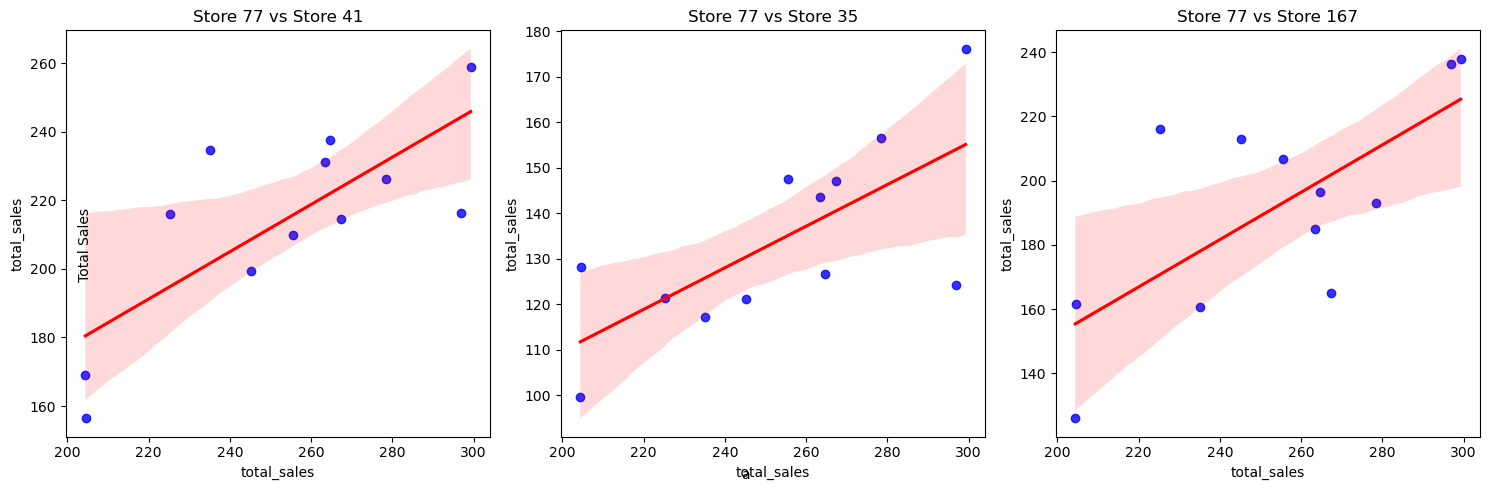

In [413]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 77 vs Store 41')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 77 vs Store 35')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 77 vs Store 167')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


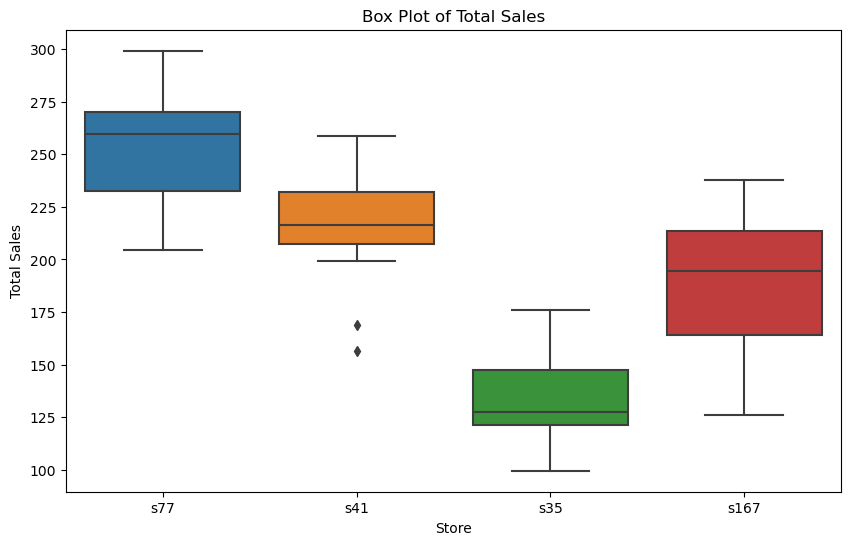

In [415]:
data = pd.DataFrame({'s77': a, 's41': b, 's35': c, 's167': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [399]:
#Perform t-test to see if total sales are significantally different
import statsmodels.stats.weightstats as smw

In [404]:
#Store 77 vs Store 41
t_test = smw.ttest_ind(a, b)
t_test

(3.1761584901431714, 0.0043705956948950665, 22.0)

In [405]:
#Store 77 vs Store 35
t_test = smw.ttest_ind(a, c)
t_test

(10.919426494400874, 2.380150103751586e-10, 22.0)

In [403]:
#Store 77 vs Store 167
t_test = smw.ttest_ind(a, d)
t_test

(4.646994899343443, 0.00012425646019855027, 22.0)

P-values are all less than 1% hence total sales are significantly different. Using the visuals plus t-test results we can infer that trial store (77) was succefull in generating more total sales. I will repeat t-tests for other 3 categories to test for what else could of impacted trial store.

In [416]:
#comparing monthly transactions now
a=s77['monthly_txns']
b=s41['monthly_txns']
c=s35['monthly_txns']
d=s167['monthly_txns']

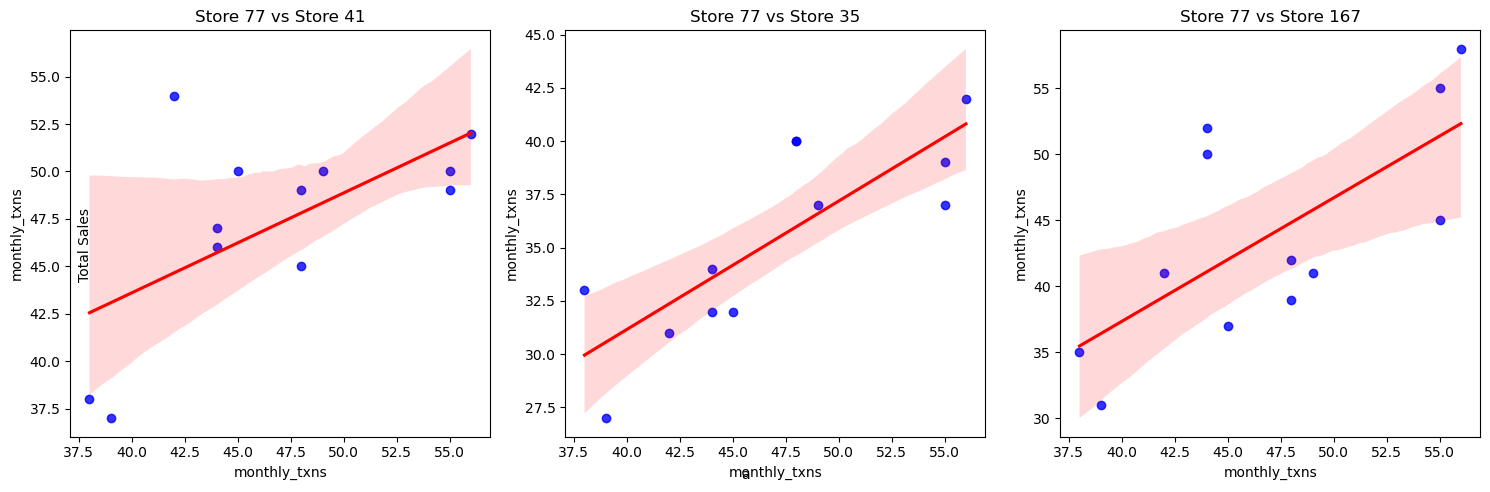

In [417]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 77 vs Store 41')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 77 vs Store 35')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 77 vs Store 167')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


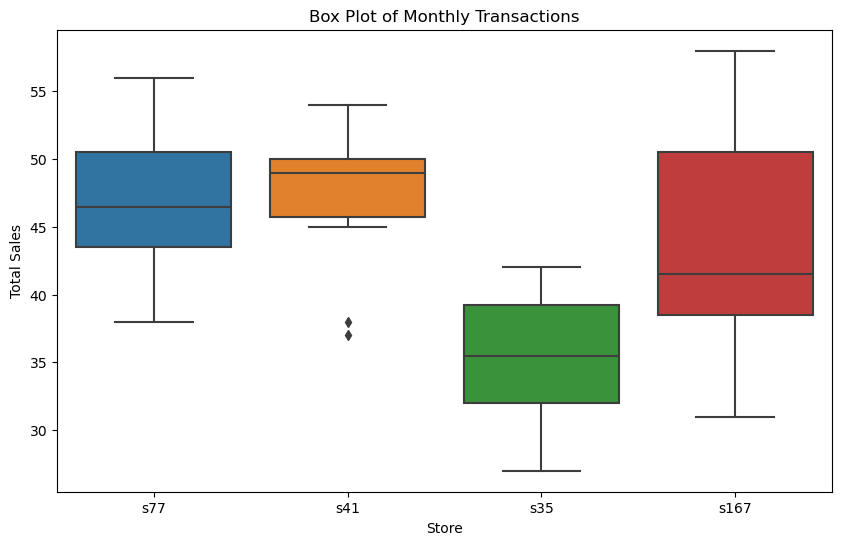

In [422]:
data = pd.DataFrame({'s77': a, 's41': b, 's35': c, 's167': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Monthly Transactions')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [418]:
#Store 77 vs Store 41
t_test = smw.ttest_ind(a, b)
t_test

(-0.14462889898522513, 0.8863206592638244, 22.0)

In [419]:
#Store 77 vs Store 35
t_test = smw.ttest_ind(a, c)
t_test

(5.295478258428241, 2.5837618740691593e-05, 22.0)

In [420]:
#Store 77 vs Store 167
t_test = smw.ttest_ind(a, d)
t_test

(1.0353955054856812, 0.3117319628457035, 22.0)

For store 41 and 167 we can't reject null hypothesis that monthly transactions are significantly different. We can infer thought that store 77 was successful in generating more monthly transactions than store 35. However, as a whole I can't decisively report store 77 was successful in generating more monthly transactions as a whole.

In [423]:
#Lets examine num_cust
a=s77['num_cust']
b=s41['num_cust']
c=s35['num_cust']
d=s167['num_cust']

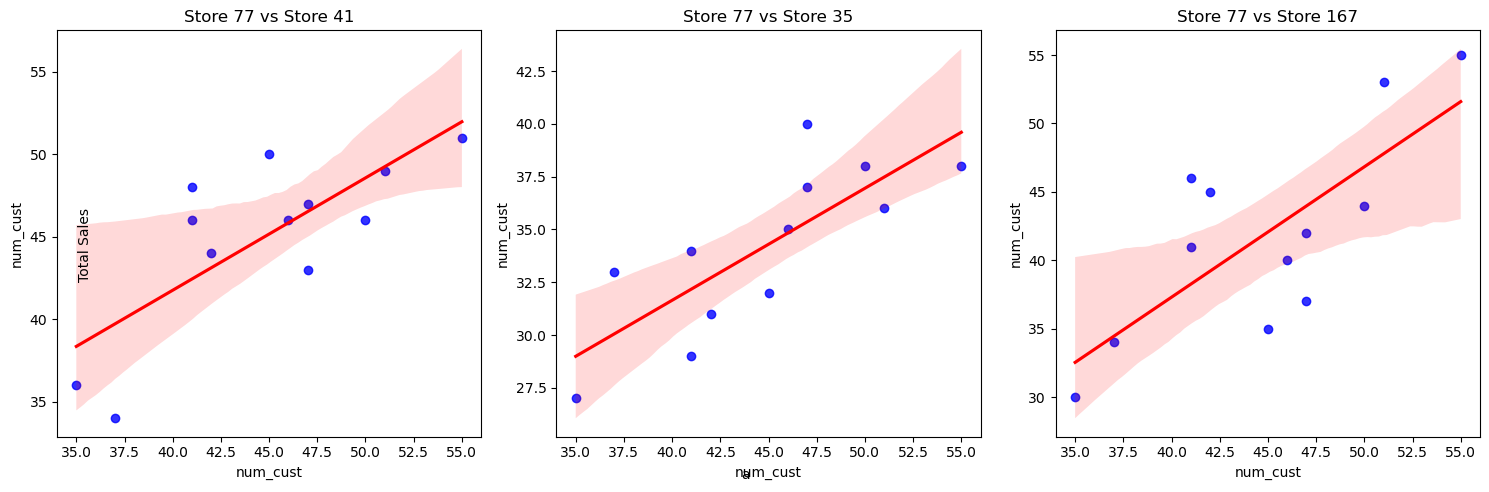

In [424]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 77 vs Store 41')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 77 vs Store 35')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 77 vs Store 167')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


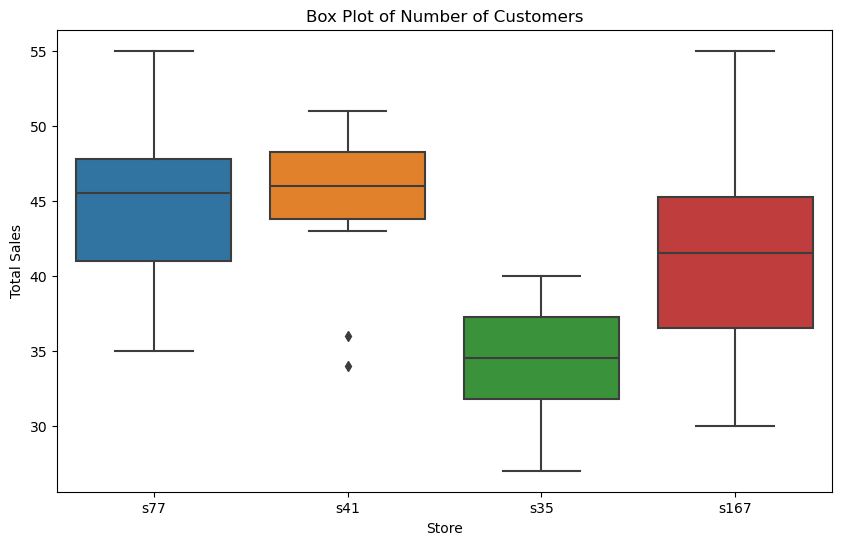

In [425]:
data = pd.DataFrame({'s77': a, 's41': b, 's35': c, 's167': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Number of Customers')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [426]:
#Store 77 vs Store 41
t_test = smw.ttest_ind(a, b)
t_test

(-0.11061562988603114, 0.9129240709029507, 22.0)

In [427]:
#Store 77 vs Store 35
t_test = smw.ttest_ind(a, c)
t_test

(5.213666617221156, 3.1452076052611254e-05, 22.0)

In [428]:
#Store 77 vs Store 167
t_test = smw.ttest_ind(a, d)
t_test

(1.0704815628615771, 0.29600689919161394, 22.0)

Exact same results as monthly transactions. Read above to see comments. Lets look at avg txn now. However since avg txn is monthly txn divided by cust num I suspect we will get same results.

In [439]:
#Lets examine avg_txn
a=s77['avg_txn']
b=s41['avg_txn']
c=s35['avg_txn']
d=s167['avg_txn']

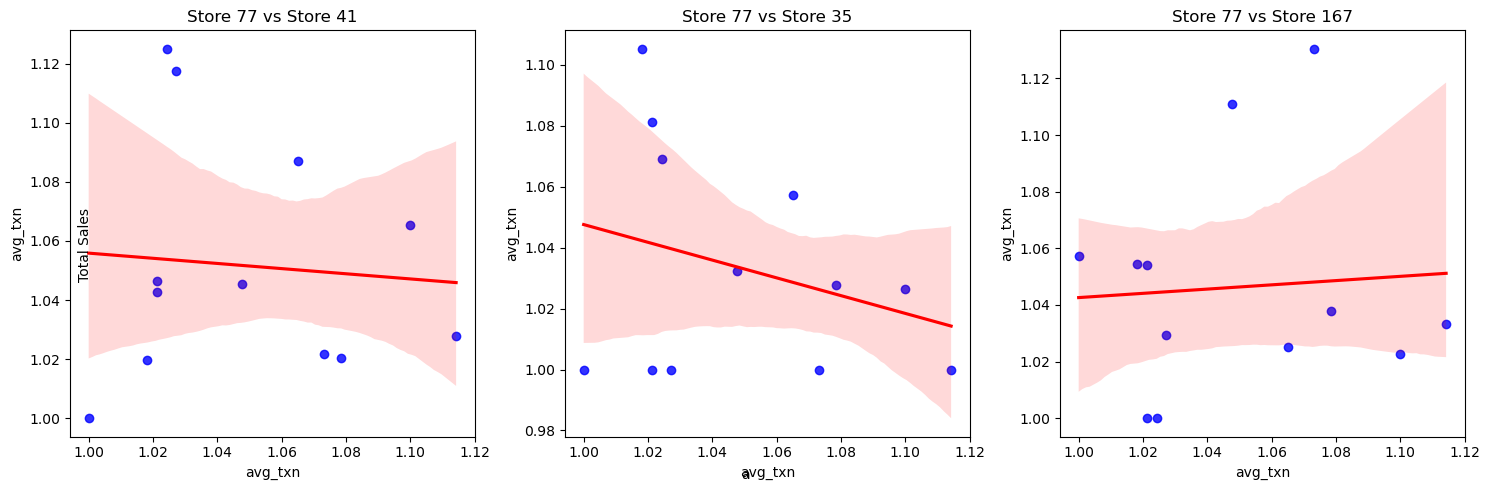

In [430]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 77 vs Store 41')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 77 vs Store 35')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 77 vs Store 167')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


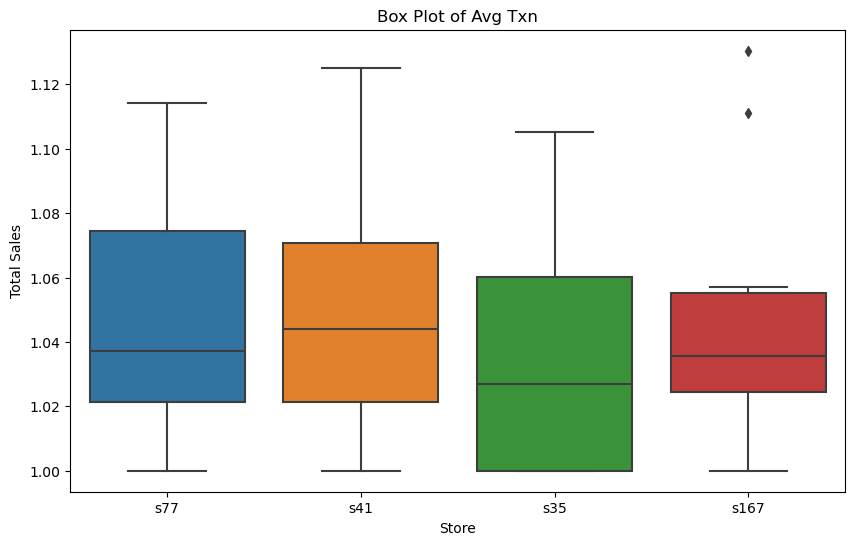

In [440]:
data = pd.DataFrame({'s77': a, 's41': b, 's35': c, 's167': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Avg Txn')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [432]:
#Store 77 vs Store 41
t_test = smw.ttest_ind(a, b)
t_test

(-0.14983595107119185, 0.8822592262990685, 22.0)

In [433]:
#Store 77 vs Store 35
t_test = smw.ttest_ind(a, c)
t_test

(1.071019644749134, 0.29577023474590064, 22.0)

In [434]:
#Store 77 vs Store 167
t_test = smw.ttest_ind(a, d)
t_test

(0.1896495366584563, 0.8513226514540742, 22.0)

This time there were no difference among all control stores. Let's examine the last category now.

In [441]:
#avg_sales_txn
a=s77['avg_sales_txn']
b=s41['avg_sales_txn']
c=s35['avg_sales_txn']
d=s167['avg_sales_txn']

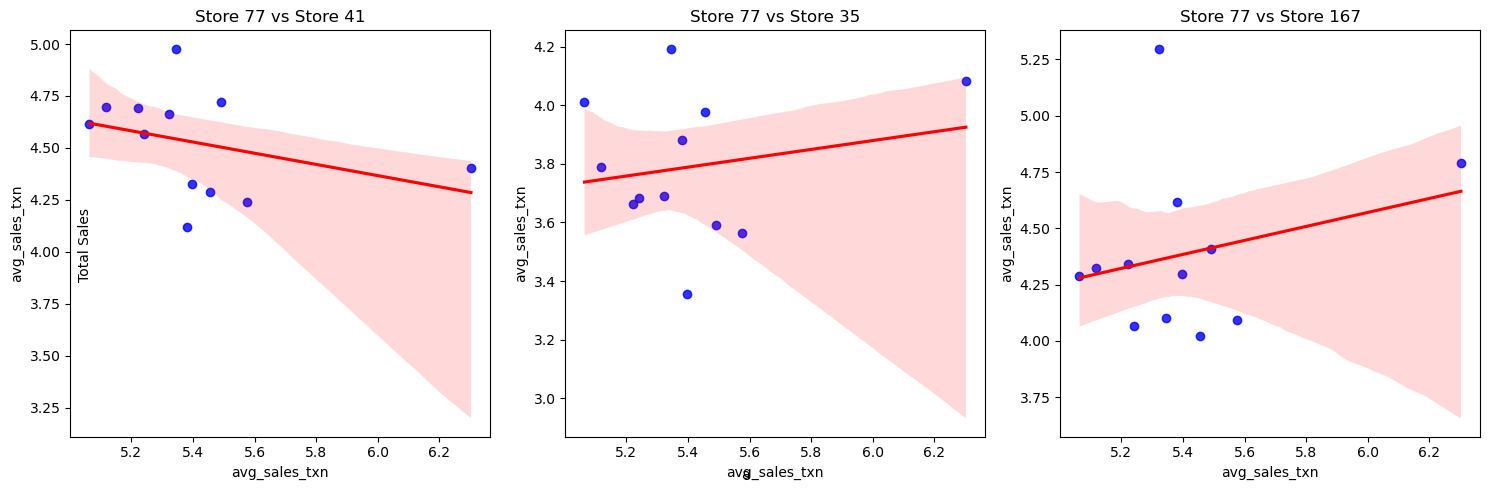

In [436]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 77 vs Store 41')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 77 vs Store 35')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 77 vs Store 167')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


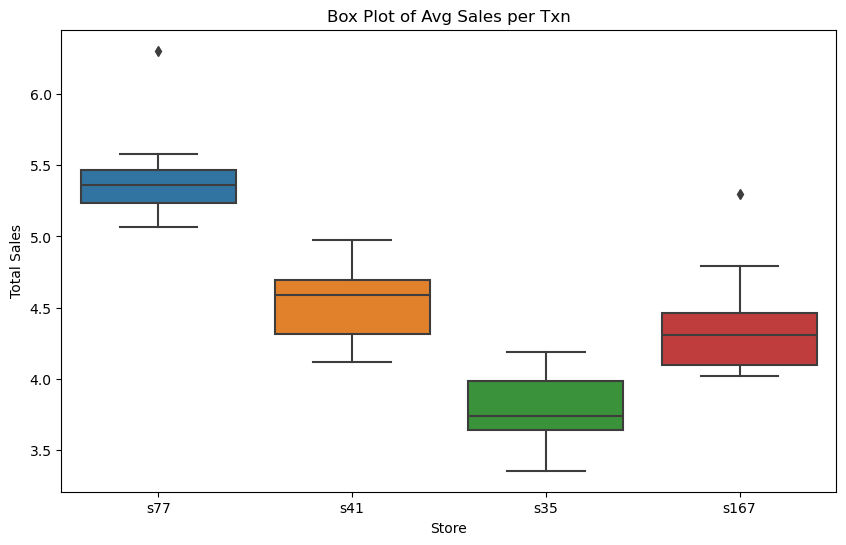

In [438]:
data = pd.DataFrame({'s77': a, 's41': b, 's35': c, 's167': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Avg Sales per Txn')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [442]:
#Store 77 vs Store 41
t_test = smw.ttest_ind(a, b)
t_test

(7.56834676201957, 1.463927732381323e-07, 22.0)

In [443]:
#Store 77 vs Store 35
t_test = smw.ttest_ind(a, c)
t_test

(13.9835764235074, 1.9982159628648566e-12, 22.0)

In [444]:
#Store 77 vs Store 167
t_test = smw.ttest_ind(a, d)
t_test

(7.304063617764409, 2.584374252044566e-07, 22.0)

### Store 77 Conclusion
Store 77 was statistically different to each control store for average txn per sales. Using the visuals I can infer store 77 was successful in creating more sales per avg transactions. I already saw that store 77 was able to generate more sales, however, we can finally see aftering analysing all key metrics that was due to store 77 success in being able to generate more sales per transaction. 

## Store 86 vs Control Stores

In [445]:
s86 = monthly[monthly.STORE_NBR==86]
s159 = monthly[monthly.STORE_NBR==159]
s231 = monthly[monthly.STORE_NBR==231]
s109 = monthly[monthly.STORE_NBR==109]

In [446]:
#Lets create scatterplots
a=s86['total_sales']
b=s159['total_sales']
c=s231['total_sales']
d=s109['total_sales']

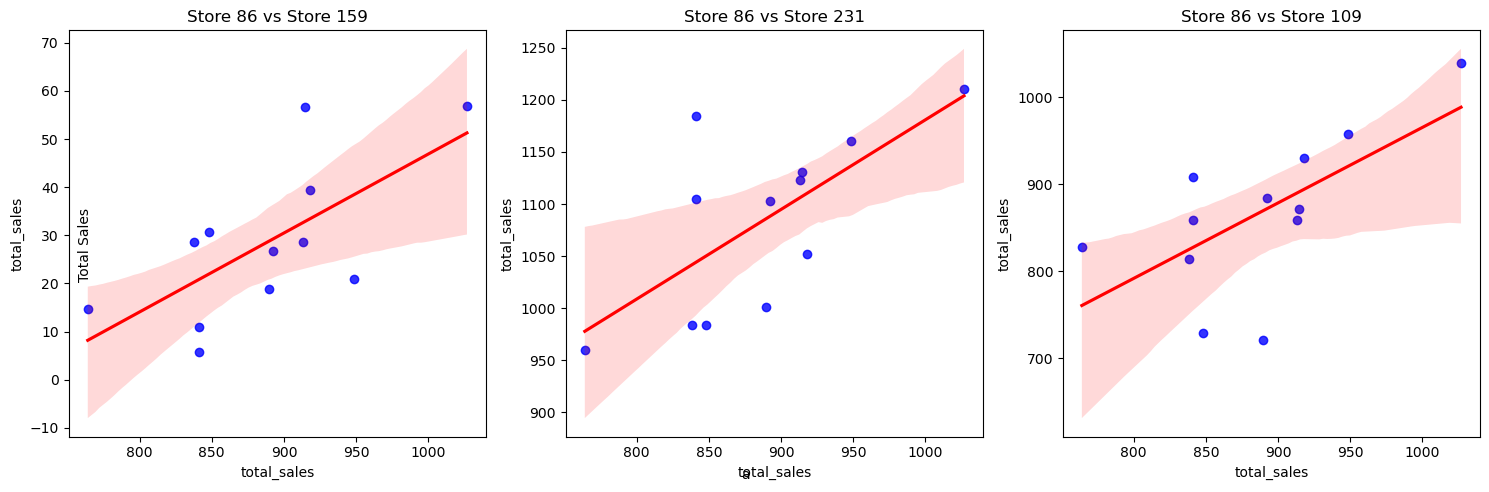

In [447]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 86 vs Store 159')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 86 vs Store 231')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 86 vs Store 109')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


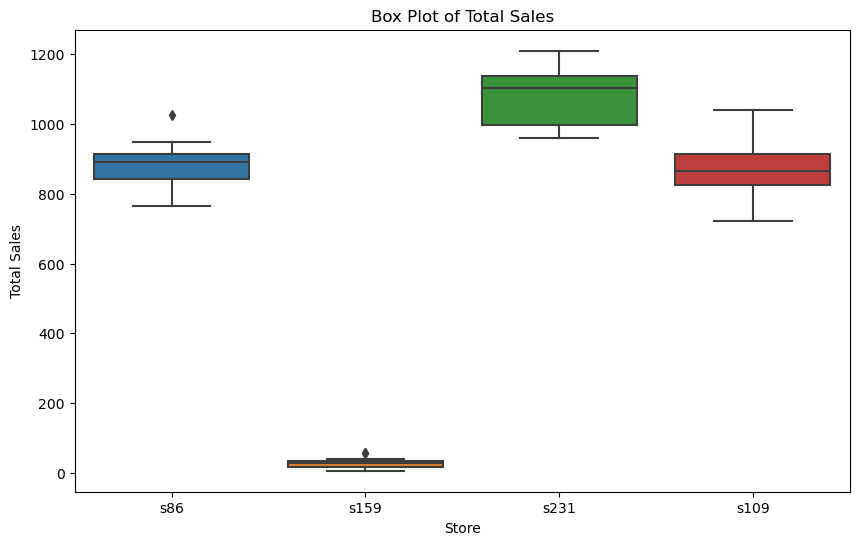

In [449]:
data = pd.DataFrame({'s86': a, 's159': b, 's231': c, 's109': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [451]:
#Store 86 vs Store 159
t_test = smw.ttest_ind(a, b)
t_test

(43.30138275717013, 8.629795047504183e-23, 22.0)

In [454]:
#Store 86 vs Store 231
t_test = smw.ttest_ind(a, c)
t_test

(-6.302248635605755, 2.421346700411316e-06, 22.0)

In [455]:
#Store 86 vs Store 109
t_test = smw.ttest_ind(a, d)
t_test

(0.6092824851535878, 0.5485783233469206, 22.0)

Store 86 is statistically different to store 159 and 231, but not store 109. However, the boxplot shows store 86 was unsuccessful in generating more total sales, especially compared to store 231. We will now analyse the reason this may of happened by examining each factors. Store 86 was successful in generating more sales than store 159, however for purpose of this analysis we want to compare as a whole.

In [456]:
#Examine monthly_txns
a=s86['monthly_txns']
b=s159['monthly_txns']
c=s231['monthly_txns']
d=s109['monthly_txns']

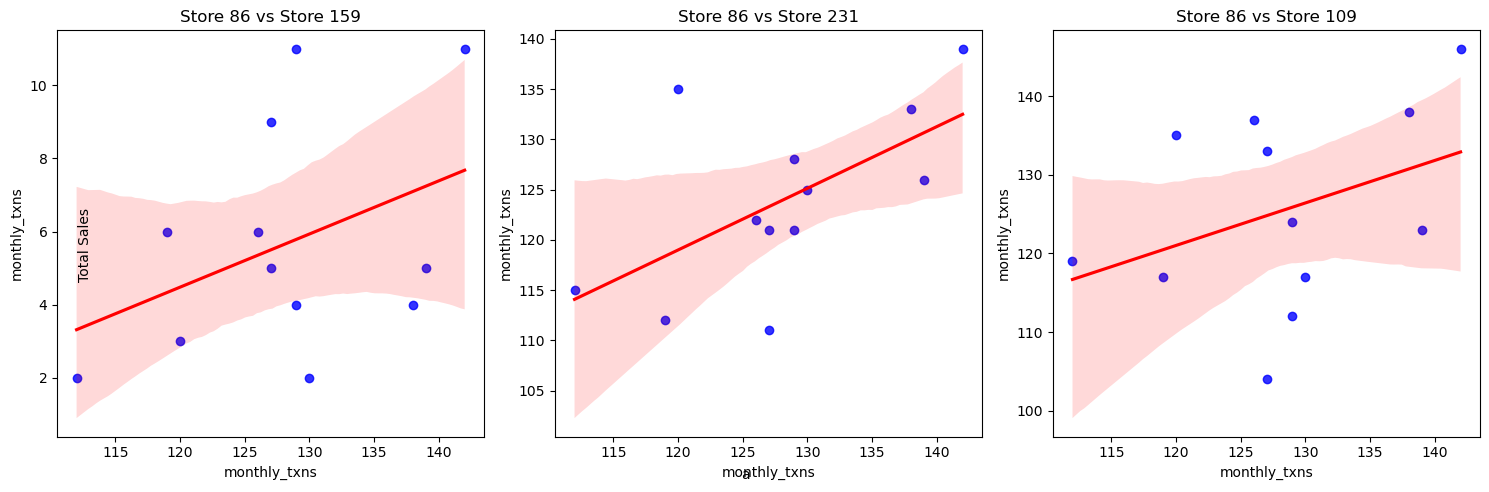

In [457]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 86 vs Store 159')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 86 vs Store 231')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 86 vs Store 109')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


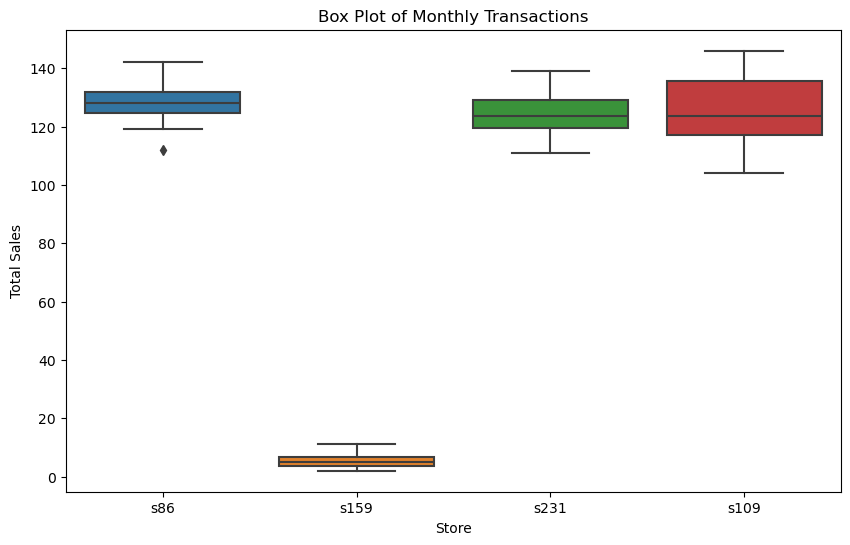

In [458]:
data = pd.DataFrame({'s86': a, 's159': b, 's231': c, 's109': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Monthly Transactions')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [459]:
#Store 86 vs Store 159
t_test = smw.ttest_ind(a, b)
t_test

(45.94565868934592, 2.3746536887325724e-23, 22.0)

In [460]:
#Store 86 vs Store 231
t_test = smw.ttest_ind(a, c)
t_test

(1.163219713700749, 0.2572023642603658, 22.0)

In [461]:
#Store 86 vs Store 109
t_test = smw.ttest_ind(a, d)
t_test

(0.6288177670222022, 0.5359433920691752, 22.0)

Monthly transactions are not statistically different to stores 231 and 109. I see it is statsitically different to store 159. This means we will not need to look at num of customers and avg txn as from store 77 I know they are related to monthly txn. I also note store 86 was successful in generating more transactions than store 159, hence store 86 was successful in its attempts to increase overall performance of store 86 compared to store 159. I will look at last factor now.

In [462]:
#Examine avg_sales_txn
a=s86['avg_sales_txn']
b=s159['avg_sales_txn']
c=s231['avg_sales_txn']
d=s109['avg_sales_txn']

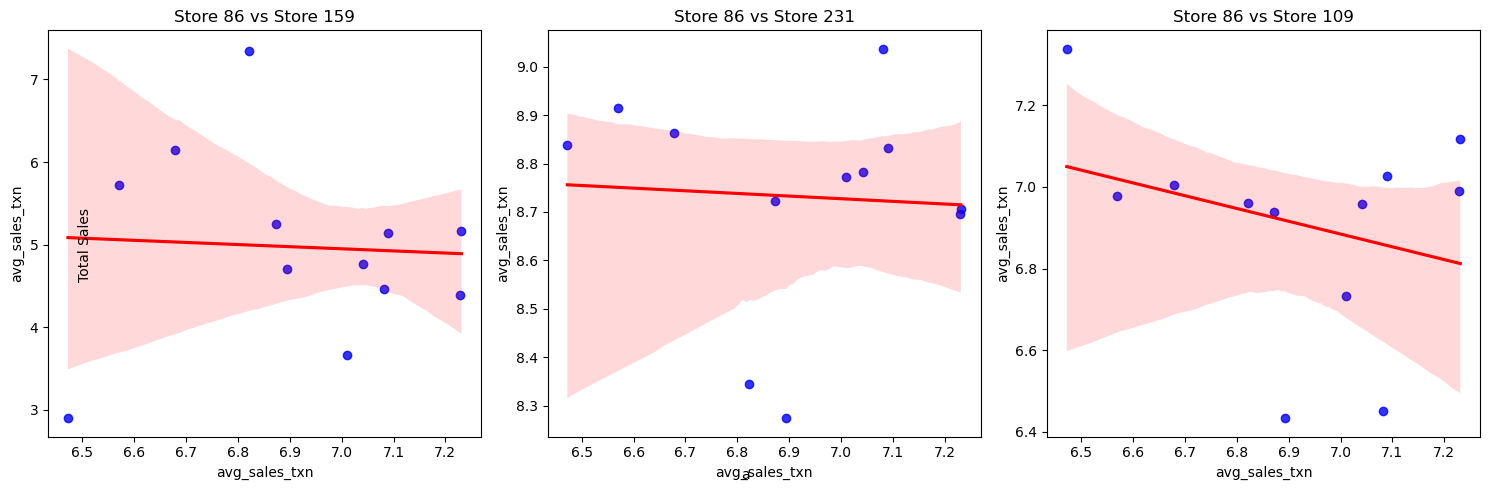

In [463]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 86 vs Store 159')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 86 vs Store 231')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 86 vs Store 109')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


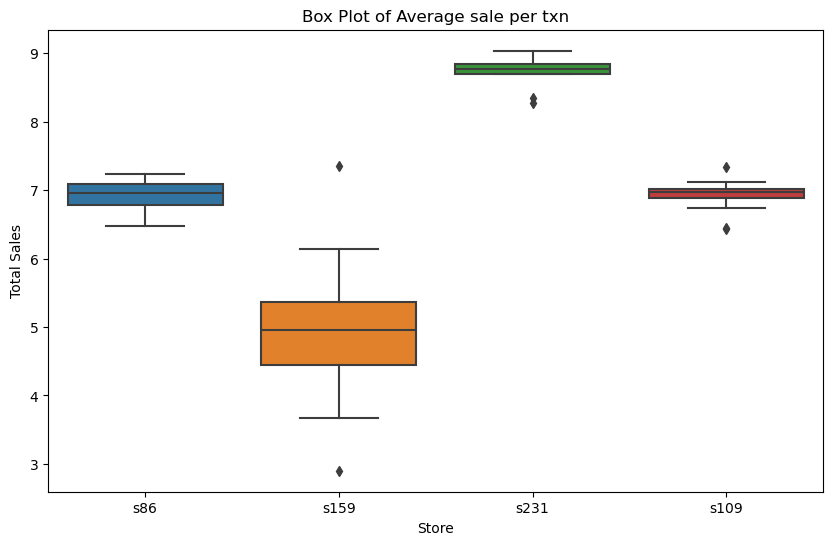

In [464]:
data = pd.DataFrame({'s86': a, 's159': b, 's231': c, 's109': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Average sale per txn')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [465]:
#Store 86 vs Store 159
t_test = smw.ttest_ind(a, b)
t_test

(5.750035142676187, 8.757790114673247e-06, 22.0)

In [466]:
#Store 86 vs Store 231
t_test = smw.ttest_ind(a, c)
t_test

(-19.102882400629444, 3.4692637058189844e-15, 22.0)

In [467]:
#Store 86 vs Store 109
t_test = smw.ttest_ind(a, d)
t_test

(0.04711153569425559, 0.9628493916810896, 22.0)

### Store 86 Conclusion
I see store 86 is statistically different to stores 159 and 231 as expected. However, we can't reject null hypothesis for store 109.  This shows store 86 failed to increase avg sale per transaction compared to store 231, however, not for store 109. I summarise store 86 was unsuccessful in generating more total sales. I know that store 86 failed to increase total sales due to not increasing average sale per txn, but we can only infer that for store 231. The 3 tests show:  
1. Store 86 performed better than store 159 across all categories.
2. Store 86 performed worse than store 231 across all categories.
3. Store 86 performed worse than store 109 acorss only total sales.
   
Based on this summary I can say performance was average, better than some and worse than overs. Will recommend comparing strategies used in that trial store vs store 77 to see why store 86 didn't perform as well vs control stores. Note that store 86 did hae higher total sales than store 77, but this analysis is comparing performance of trial stores vs control stores, in which I have shown store 77 performed better.


## Store 88 vs Control Stores

Store 77: Store 41 (0.762), Store 35 (0.700), Store 167 (0.696)  
Store 86: Store 159 (0.676), Store 231 (0.674), Store 109 (0.643)  
Store 88: Store 159 (0.863), Store 201 (0.738) Store 188 (0.734)

In [468]:
s88 = monthly[monthly.STORE_NBR==88]
s159 = monthly[monthly.STORE_NBR==159]
s201 = monthly[monthly.STORE_NBR==201]
s188 = monthly[monthly.STORE_NBR==188]

In [469]:
a=s88['total_sales']
b=s159['total_sales']
c=s201['total_sales']
d=s188['total_sales']

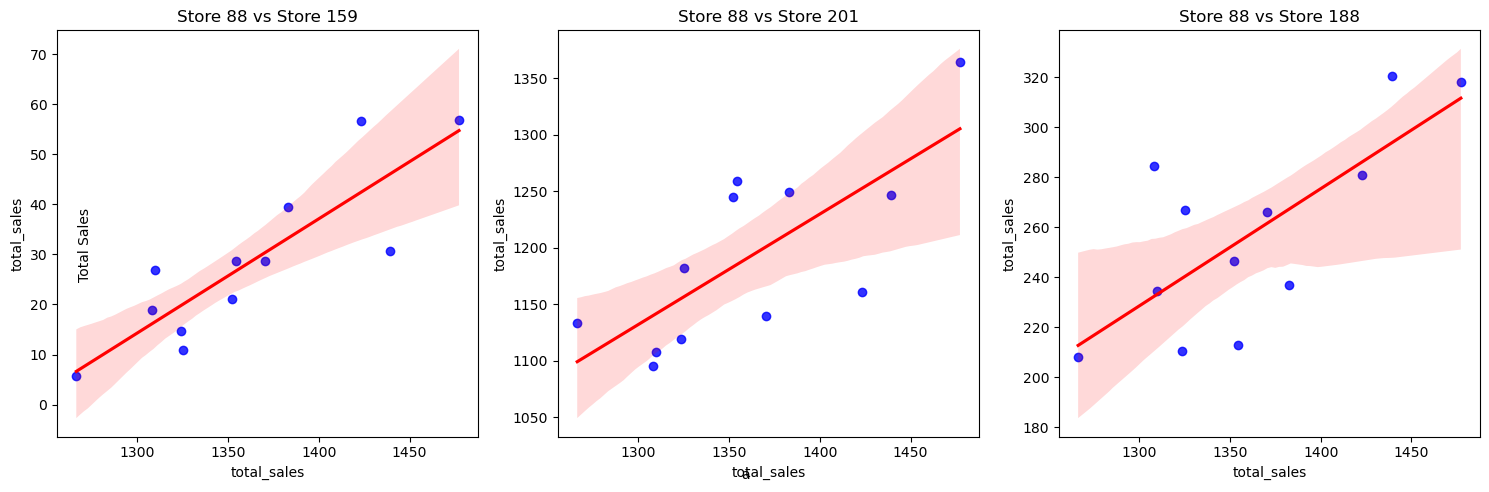

In [470]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 88 vs Store 159')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 88 vs Store 201')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 88 vs Store 188')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


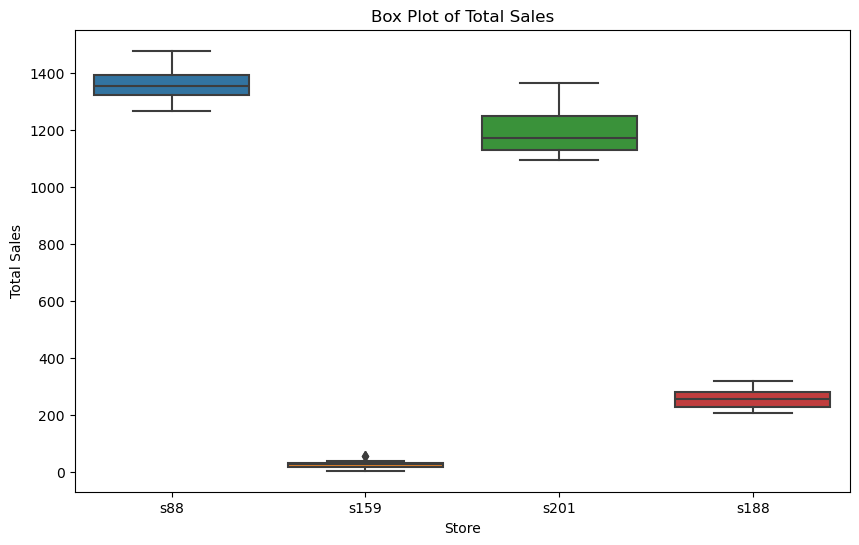

In [471]:
data = pd.DataFrame({'s88': a, 's159': b, 's201': c, 's188': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [472]:
#Store 88 vs Store 159
t_test = smw.ttest_ind(a, b)
t_test

(72.96522319597975, 9.660843765566018e-28, 22.0)

In [473]:
#Store 88 vs Store 201
t_test = smw.ttest_ind(a, c)
t_test

(5.781312621752293, 8.135468826420546e-06, 22.0)

In [474]:
#Store 88 vs Store 188
t_test = smw.ttest_ind(a, d)
t_test

(52.65939080494281, 1.2128239413788448e-24, 22.0)

Store 88 is statistically different to all stores and from boxplot we see store 88 was successful in generating more total sales. Lets examine monthly txn.

In [475]:
a=s88['monthly_txns']
b=s159['monthly_txns']
c=s201['monthly_txns']
d=s188['monthly_txns']

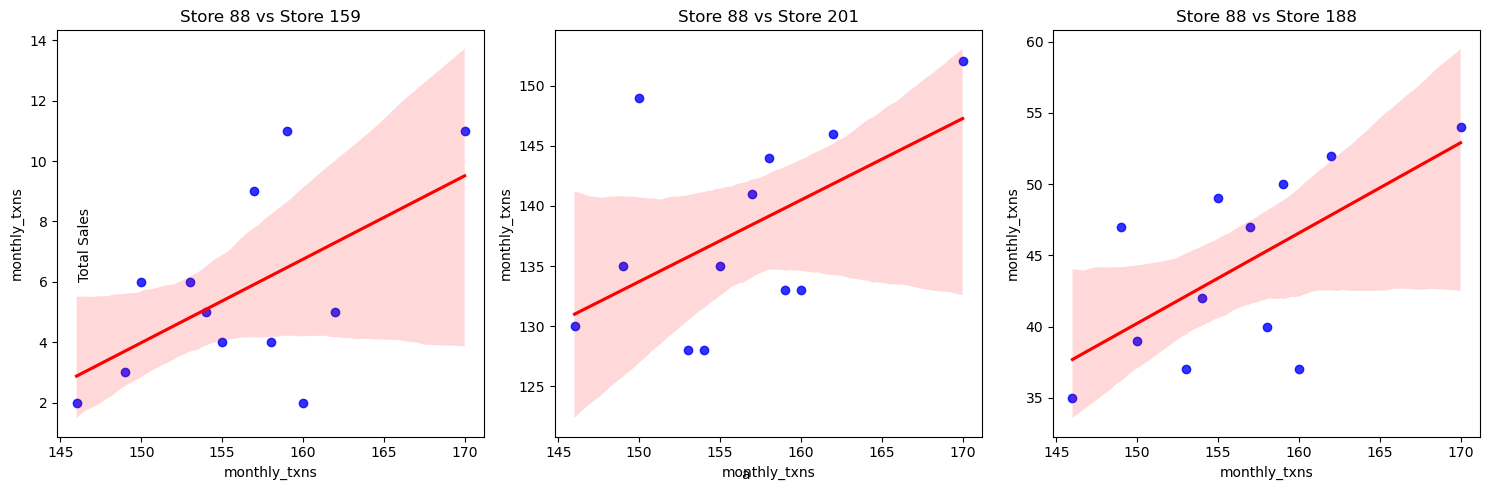

In [476]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 88 vs Store 159')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 88 vs Store 201')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 88 vs Store 188')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


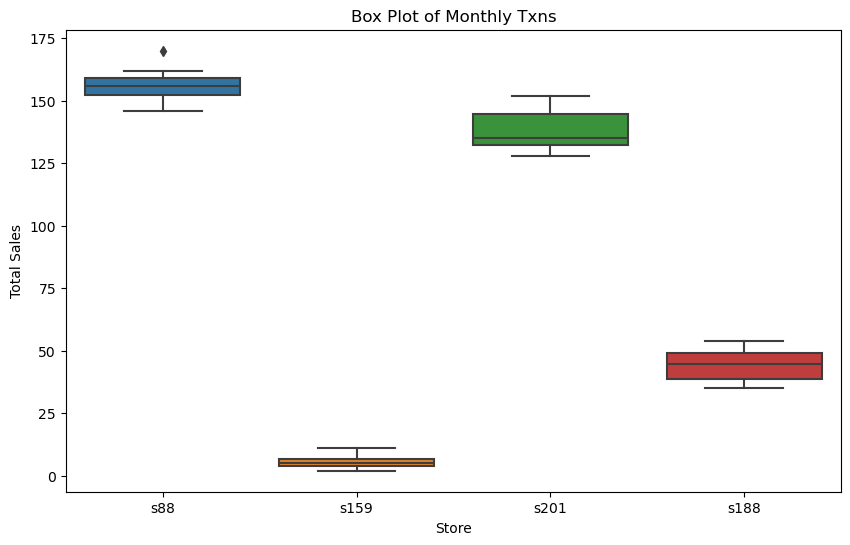

In [477]:
data = pd.DataFrame({'s88': a, 's159': b, 's201': c, 's188': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Monthly Txns')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [478]:
#Store 88 vs Store 159
t_test = smw.ttest_ind(a, b)
t_test

(72.41095735243677, 1.1417770319624823e-27, 22.0)

In [479]:
#Store 88 vs Store 201
t_test = smw.ttest_ind(a, c)
t_test

(6.006510179407097, 4.799876247409234e-06, 22.0)

In [480]:
#Store 88 vs Store 188
t_test = smw.ttest_ind(a, d)
t_test

(42.244483325929814, 1.477100404024231e-22, 22.0)

Again store 88 is statistically different than all other stores. From boxplot I infer store 88 was successful in generating more monthly txns. From store 77 analysis that extends to number of customers and average customer txns. Just need to analyse avg sale per txn.

In [481]:
a=s88['avg_sales_txn']
b=s159['avg_sales_txn']
c=s201['avg_sales_txn']
d=s188['avg_sales_txn']

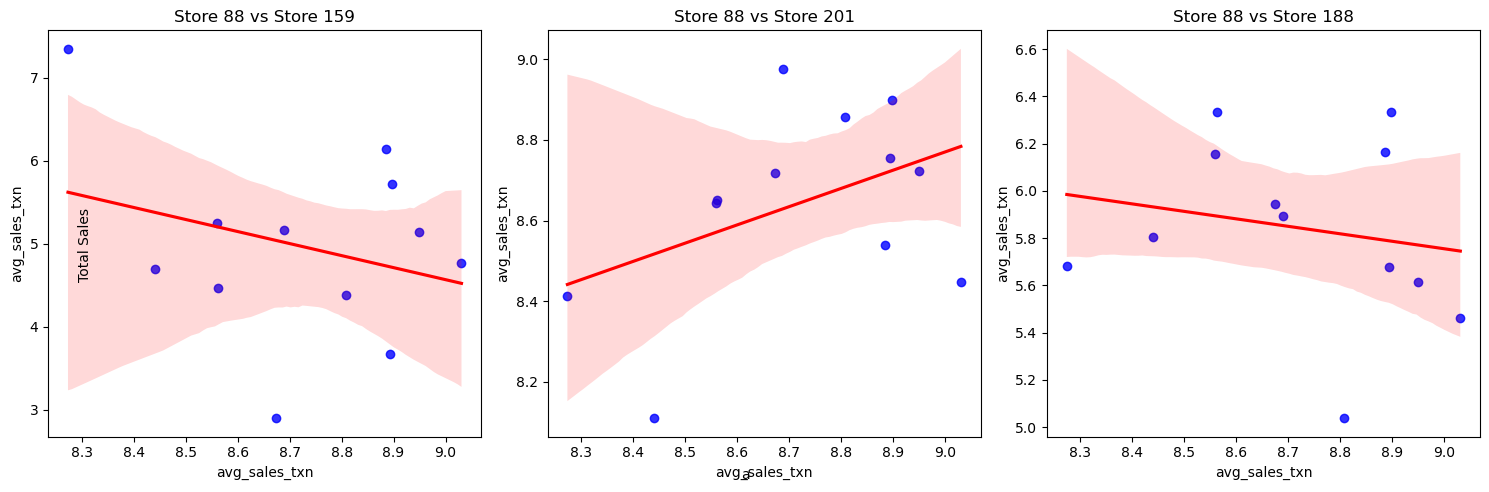

In [482]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot with regression line for a vs b
sns.regplot(x=a, y=b, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Store 88 vs Store 159')

# Scatter plot with regression line for a vs c
sns.regplot(x=a, y=c, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Store 88 vs Store 201')

# Scatter plot with regression line for a vs d
sns.regplot(x=a, y=d, ax=axes[2], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2].set_title('Store 88 vs Store 188')

# Set common xlabel and ylabel
fig.text(0.5, 0.04, 'a', ha='center', va='center')
fig.text(0.06, 0.5, 'Total Sales', ha='center', va='center', rotation='vertical')

# Show the plots
plt.tight_layout()
plt.show()


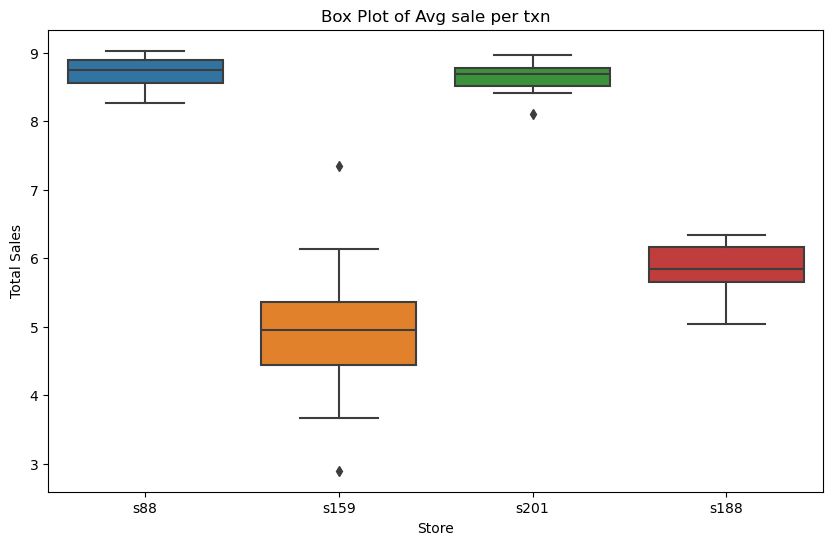

In [483]:
data = pd.DataFrame({'s88': a, 's159': b, 's201': c, 's188': d})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Avg sale per txn')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [484]:
#Store 88 vs Store 159
t_test = smw.ttest_ind(a, b)
t_test

(11.122590544326796, 1.6841153112377416e-10, 22.0)

In [485]:
#Store 88 vs Store 201
t_test = smw.ttest_ind(a, c)
t_test

(0.8108340613166678, 0.42614614649469706, 22.0)

In [486]:
#Store 88 vs Store 188
t_test = smw.ttest_ind(a, d)
t_test

(22.417584634047486, 1.2114936954950855e-16, 22.0)

### Store 88 Conclusion
Store 88 is not statistically different than store 201 when it comes to avg sale per txn. It is statisfically different to the other stores. This means I infer the reason store 88 was able to generate more total sales than all other stores was due to higher monthly transactions. Overall I conclude store 88 was able to perform better than all control stores.

# Conclusion

Julia was successful in increasing performance of store 77 and 88, however not store 86. I will sumarise the key metrics that lead to this:
1. Store 77 Julia was able to increase average sales per transaction which lead to increased performance over other stores.
2. Store 86 performed average. Was able to beat 1 control over all categories, but was beaten by anther control over all categories and other control only failed to increase total sales.
3. Store 88 was able to out perform all control stores due to increasing monthly transactions.


## Recommendations  
1. Analyse strategies used in store 77 and 88 to see why they were able to increase average sale per txn and monthly transactions, respectively.
2. Compare to see what strategies were used in store 86 to see why its performance wasn't as good.
3. Combine all well performing strategies and drop failing strategies and create new trial stores to implement these to see if you can get the trial stores to increase performance across all categories. 